In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [215]:
df=pd.read_csv('original_dataset.csv')

df=df.drop(['DailyRate','EmployeeCount','YearsAtCompany','TotalWorkingYears','JobLevel','HourlyRate','MonthlyRate','Over18','StandardHours','EnvironmentSatisfaction','JobInvolvement','PerformanceRating','TrainingTimesLastYear','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','YearsWithCurrManager'],axis=1)

df = df[['Attrition',
	       'Age',
	       'BusinessTravel',
	       'Department',
	       'DistanceFromHome',
	       'Education',
	       'EducationField',
	       'Gender',
	       'JobRole',
	       'JobSatisfaction',
	       'MaritalStatus',
	       'MonthlyIncome',
	       'NumCompaniesWorked',
	       'OverTime',
	       'PercentSalaryHike',
	       'YearsInCurrentRole',
	       'YearsSinceLastPromotion']]
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,YearsInCurrentRole,YearsSinceLastPromotion
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,Female,Sales Executive,4,Single,5993,8,Yes,11,4,0
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,Male,Research Scientist,2,Married,5130,1,No,23,7,1
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,Yes,15,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,Female,Research Scientist,3,Married,2909,1,Yes,11,7,3
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,Male,Laboratory Technician,2,Married,3468,9,No,12,2,2


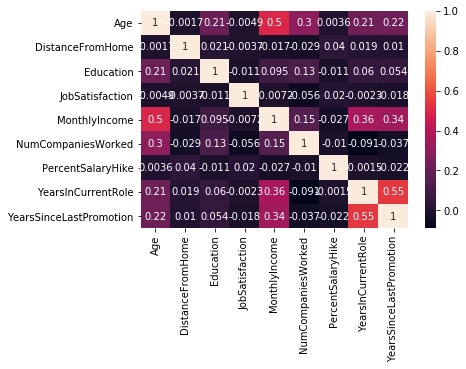

In [216]:
Var_Corr = df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [237]:
print(df.nunique())
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
t=df.iloc[3,1:].values
print(X)

Attrition                     2
Age                          43
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
OverTime                      2
PercentSalaryHike            15
YearsInCurrentRole           19
YearsSinceLastPromotion      16
dtype: int64
[[41 'Travel_Rarely' 'Sales' ... 11 4 0]
 [49 'Travel_Frequently' 'Research & Development' ... 23 7 1]
 [37 'Travel_Rarely' 'Research & Development' ... 15 0 0]
 ...
 [27 'Travel_Rarely' 'Research & Development' ... 20 2 0]
 [49 'Travel_Frequently' 'Sales' ... 14 6 0]
 [34 'Travel_Rarely' 'Research & Development' ... 12 3 1]]


In [238]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

labelencoder_X_5 = LabelEncoder()
X[:, 5] = labelencoder_X_5.fit_transform(X[:, 5])

labelencoder_X_6 = LabelEncoder()
X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
labelencoder_X_9 = LabelEncoder()
X[:, 9] = labelencoder_X_9.fit_transform(X[:, 9])
labelencoder_X_12 = LabelEncoder()
X[:, 12] = labelencoder_X_12.fit_transform(X[:, 12])

X = X.astype(float)
labelencoder_y= LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [239]:
onehotencoder1 = OneHotEncoder(categorical_features = [1])
X = onehotencoder1.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder2 = OneHotEncoder(categorical_features = [3])
X = onehotencoder2.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder5 = OneHotEncoder(categorical_features = [5])
X = onehotencoder5.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder7 = OneHotEncoder(categorical_features = [11])
X = onehotencoder7.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder9 = OneHotEncoder(categorical_features = [19])
X = onehotencoder9.fit_transform(X).toarray()
X = X[:,1:]


c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [241]:
s=SVC()
s.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
p=s.predict(X_test)
print(accuracy_score(y_test,p))


0.8418367346938775


In [242]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

p=model.predict(X_test)
print(accuracy_score(y_test,p))

0.8622448979591837


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [243]:
labelencoder_X_1 = LabelEncoder()
t[1] = labelencoder_X_1.fit_transform(t[1])

labelencoder_X_2 = LabelEncoder()
t[2] = labelencoder_X_2.fit_transform(t[2])

labelencoder_X_5 = LabelEncoder()
t[5] = labelencoder_X_5.fit_transform(t[5])

labelencoder_X_6 = LabelEncoder()
t[6] = labelencoder_X_6.fit_transform(t[6])
labelencoder_X_7 = LabelEncoder()
t[7] = labelencoder_X_7.fit_transform(t[7])
labelencoder_X_9 = LabelEncoder()
t[9] = labelencoder_X_9.fit_transform(t[9])
labelencoder_X_12 = LabelEncoder()
t[12] = labelencoder_X_12.fit_transform(t[12])

t = t.astype(float)

onehotencoder1 = OneHotEncoder(categorical_features = [1])
t = onehotencoder1.fit_transform(t).toarray()
t = t[1:]

onehotencoder2 = OneHotEncoder(categorical_features = [3])
t = onehotencoder2.fit_transform(t).toarray()
t = t[1:]

onehotencoder5 = OneHotEncoder(categorical_features = [5])
t = onehotencoder5.fit_transform(t).toarray()
t = t[1:]

onehotencoder7 = OneHotEncoder(categorical_features = [11])
t = onehotencoder7.fit_transform(t).toarray()
t = t[1:]

onehotencoder9 = OneHotEncoder(categorical_features = [19])
t = onehotencoder9.fit_transform(X).toarray()
t = t[1:]

t = sc.transform(t)
p=s.predict(t)
print(p)


ValueError: bad input shape ()

In [244]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
p=clf.predict(X_test)

print(accuracy_score(y_test,p))

0.858843537414966


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'
k = 20

In [73]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 30)
max = accuracies.max()

Epoch 1/100
994/994 [==============================] - 4s 4ms/step - loss: 0.6790 - acc: 0.7414
Epoch 2/100
994/994 [==============================] - 0s 103us/step - loss: 0.6351 - acc: 0.8541
Epoch 3/100
994/994 [==============================] - 0s 125us/step - loss: 0.5713 - acc: 0.8541
Epoch 4/100
994/994 [==============================] - 0s 122us/step - loss: 0.4971 - acc: 0.8541
Epoch 5/100
994/994 [==============================] - 0s 106us/step - loss: 0.4316 - acc: 0.8541
Epoch 6/100
994/994 [==============================] - 0s 106us/step - loss: 0.3852 - acc: 0.8541
Epoch 7/100
994/994 [==============================] - 0s 136us/step - loss: 0.3613 - acc: 0.8541
Epoch 8/100
994/994 [==============================] - 0s 105us/step - loss: 0.3445 - acc: 0.8541
Epoch 9/100
994/994 [==============================] - 0s 100us/step - loss: 0.3339 - acc: 0.8541
Epoch 10/100
994/994 [==============================] - 0s 111us/step - loss: 0.3300 - acc: 0.8541
Epoch 11/100
994/994 

994/994 [==============================] - 0s 119us/step - loss: 0.2232 - acc: 0.9095
Epoch 84/100
994/994 [==============================] - 0s 114us/step - loss: 0.2191 - acc: 0.9145
Epoch 85/100
994/994 [==============================] - 0s 103us/step - loss: 0.2227 - acc: 0.9095
Epoch 86/100
994/994 [==============================] - 0s 100us/step - loss: 0.2206 - acc: 0.9125
Epoch 87/100
994/994 [==============================] - 0s 100us/step - loss: 0.2115 - acc: 0.9155
Epoch 88/100
994/994 [==============================] - 0s 102us/step - loss: 0.2099 - acc: 0.9195
Epoch 89/100
994/994 [==============================] - 0s 123us/step - loss: 0.2184 - acc: 0.9125
Epoch 90/100
994/994 [==============================] - 0s 109us/step - loss: 0.2113 - acc: 0.9195
Epoch 91/100
994/994 [==============================] - 0s 104us/step - loss: 0.2135 - acc: 0.9145
Epoch 92/100
994/994 [==============================] - 0s 102us/step - loss: 0.2065 - acc: 0.9145
Epoch 93/100
994/994 [=

994/994 [==============================] - 0s 108us/step - loss: 0.2305 - acc: 0.9074
Epoch 66/100
994/994 [==============================] - 0s 119us/step - loss: 0.2285 - acc: 0.9145
Epoch 67/100
994/994 [==============================] - 0s 122us/step - loss: 0.2279 - acc: 0.9054
Epoch 68/100
994/994 [==============================] - 0s 110us/step - loss: 0.2256 - acc: 0.9145
Epoch 69/100
994/994 [==============================] - 0s 106us/step - loss: 0.2319 - acc: 0.9095
Epoch 70/100
994/994 [==============================] - 0s 103us/step - loss: 0.2305 - acc: 0.9085
Epoch 71/100
994/994 [==============================] - 0s 111us/step - loss: 0.2294 - acc: 0.9155
Epoch 72/100
994/994 [==============================] - 0s 99us/step - loss: 0.2242 - acc: 0.9175
Epoch 73/100
994/994 [==============================] - 0s 104us/step - loss: 0.2199 - acc: 0.9155
Epoch 74/100
994/994 [==============================] - 0s 120us/step - loss: 0.2167 - acc: 0.9155
Epoch 75/100
994/994 [==

994/994 [==============================] - 0s 111us/step - loss: 0.2571 - acc: 0.9064
Epoch 48/100
994/994 [==============================] - 0s 104us/step - loss: 0.2576 - acc: 0.9064
Epoch 49/100
994/994 [==============================] - 0s 103us/step - loss: 0.2557 - acc: 0.9064
Epoch 50/100
994/994 [==============================] - 0s 100us/step - loss: 0.2529 - acc: 0.9024
Epoch 51/100
994/994 [==============================] - 0s 100us/step - loss: 0.2578 - acc: 0.8984
Epoch 52/100
994/994 [==============================] - 0s 100us/step - loss: 0.2542 - acc: 0.8984
Epoch 53/100
994/994 [==============================] - 0s 106us/step - loss: 0.2541 - acc: 0.8984
Epoch 54/100
994/994 [==============================] - 0s 105us/step - loss: 0.2537 - acc: 0.9004
Epoch 55/100
994/994 [==============================] - 0s 106us/step - loss: 0.2472 - acc: 0.9054
Epoch 56/100
994/994 [==============================] - 0s 101us/step - loss: 0.2493 - acc: 0.9095
Epoch 57/100
994/994 [=

994/994 [==============================] - 0s 114us/step - loss: 0.2742 - acc: 0.8944
Epoch 30/100
994/994 [==============================] - 0s 106us/step - loss: 0.2729 - acc: 0.8893
Epoch 31/100
994/994 [==============================] - 0s 105us/step - loss: 0.2720 - acc: 0.8893
Epoch 32/100
994/994 [==============================] - 0s 101us/step - loss: 0.2741 - acc: 0.8823
Epoch 33/100
994/994 [==============================] - 0s 101us/step - loss: 0.2731 - acc: 0.8833
Epoch 34/100
994/994 [==============================] - 0s 104us/step - loss: 0.2722 - acc: 0.8913
Epoch 35/100
994/994 [==============================] - 0s 102us/step - loss: 0.2594 - acc: 0.8924
Epoch 36/100
994/994 [==============================] - 0s 98us/step - loss: 0.2667 - acc: 0.8833
Epoch 37/100
994/994 [==============================] - 0s 97us/step - loss: 0.2640 - acc: 0.8903
Epoch 38/100
994/994 [==============================] - 0s 108us/step - loss: 0.2631 - acc: 0.8863
Epoch 39/100
994/994 [===

994/994 [==============================] - 0s 118us/step - loss: 0.3282 - acc: 0.8551
Epoch 12/100
994/994 [==============================] - 0s 105us/step - loss: 0.3273 - acc: 0.8602
Epoch 13/100
994/994 [==============================] - 0s 140us/step - loss: 0.3217 - acc: 0.8602
Epoch 14/100
994/994 [==============================] - 0s 133us/step - loss: 0.3152 - acc: 0.8642
Epoch 15/100
994/994 [==============================] - 0s 120us/step - loss: 0.3141 - acc: 0.8662
Epoch 16/100
994/994 [==============================] - 0s 107us/step - loss: 0.3098 - acc: 0.8672
Epoch 17/100
994/994 [==============================] - 0s 108us/step - loss: 0.3106 - acc: 0.8672
Epoch 18/100
994/994 [==============================] - 0s 131us/step - loss: 0.3043 - acc: 0.8783
Epoch 19/100
994/994 [==============================] - 0s 136us/step - loss: 0.2984 - acc: 0.8773
Epoch 20/100
994/994 [==============================] - 0s 116us/step - loss: 0.2914 - acc: 0.8873
Epoch 21/100
994/994 [=

994/994 [==============================] - 0s 122us/step - loss: 0.2110 - acc: 0.9185
Epoch 94/100
994/994 [==============================] - 0s 108us/step - loss: 0.2052 - acc: 0.9225
Epoch 95/100
994/994 [==============================] - 0s 105us/step - loss: 0.2016 - acc: 0.9205
Epoch 96/100
994/994 [==============================] - 0s 107us/step - loss: 0.2055 - acc: 0.9185
Epoch 97/100
994/994 [==============================] - 0s 106us/step - loss: 0.2065 - acc: 0.9215
Epoch 98/100
994/994 [==============================] - 0s 112us/step - loss: 0.1998 - acc: 0.9215
Epoch 99/100
994/994 [==============================] - 0s 111us/step - loss: 0.2011 - acc: 0.9205
Epoch 100/100
35/35 [==============================] - 1s 40ms/step
Epoch 1/100
994/994 [==============================] - 3s 3ms/step - loss: 0.6843 - acc: 0.6419
Epoch 2/100
994/994 [==============================] - 0s 108us/step - loss: 0.6351 - acc: 0.8501
Epoch 3/100
994/994 [==============================] - 0s 

994/994 [==============================] - 0s 107us/step - loss: 0.2066 - acc: 0.9205
Epoch 76/100
994/994 [==============================] - 0s 102us/step - loss: 0.2026 - acc: 0.9205
Epoch 77/100
994/994 [==============================] - 0s 102us/step - loss: 0.2059 - acc: 0.9205
Epoch 78/100
994/994 [==============================] - 0s 105us/step - loss: 0.2103 - acc: 0.9155
Epoch 79/100
994/994 [==============================] - 0s 107us/step - loss: 0.1992 - acc: 0.9256
Epoch 80/100
994/994 [==============================] - 0s 108us/step - loss: 0.2063 - acc: 0.9155
Epoch 81/100
994/994 [==============================] - 0s 106us/step - loss: 0.2023 - acc: 0.9165
Epoch 82/100
994/994 [==============================] - 0s 110us/step - loss: 0.1959 - acc: 0.9235
Epoch 83/100
994/994 [==============================] - 0s 106us/step - loss: 0.1899 - acc: 0.9245
Epoch 84/100
994/994 [==============================] - 0s 106us/step - loss: 0.1937 - acc: 0.9165
Epoch 85/100
994/994 [=

994/994 [==============================] - 0s 121us/step - loss: 0.2285 - acc: 0.9145
Epoch 58/100
994/994 [==============================] - 0s 103us/step - loss: 0.2357 - acc: 0.9074
Epoch 59/100
994/994 [==============================] - 0s 109us/step - loss: 0.2294 - acc: 0.9054
Epoch 60/100
994/994 [==============================] - 0s 104us/step - loss: 0.2334 - acc: 0.9125
Epoch 61/100
994/994 [==============================] - 0s 102us/step - loss: 0.2380 - acc: 0.9115
Epoch 62/100
994/994 [==============================] - 0s 106us/step - loss: 0.2333 - acc: 0.9074
Epoch 63/100
994/994 [==============================] - 0s 111us/step - loss: 0.2302 - acc: 0.9115
Epoch 64/100
994/994 [==============================] - 0s 108us/step - loss: 0.2291 - acc: 0.9105
Epoch 65/100
994/994 [==============================] - 0s 103us/step - loss: 0.2244 - acc: 0.9074
Epoch 66/100
994/994 [==============================] - 0s 104us/step - loss: 0.2222 - acc: 0.9115
Epoch 67/100
994/994 [=

994/994 [==============================] - 0s 129us/step - loss: 0.2527 - acc: 0.9115
Epoch 40/100
994/994 [==============================] - 0s 124us/step - loss: 0.2520 - acc: 0.9074
Epoch 41/100
994/994 [==============================] - 0s 102us/step - loss: 0.2537 - acc: 0.9044
Epoch 42/100
994/994 [==============================] - 0s 120us/step - loss: 0.2530 - acc: 0.8974
Epoch 43/100
994/994 [==============================] - 0s 129us/step - loss: 0.2530 - acc: 0.9014
Epoch 44/100
994/994 [==============================] - 0s 120us/step - loss: 0.2445 - acc: 0.9054
Epoch 45/100
994/994 [==============================] - 0s 110us/step - loss: 0.2469 - acc: 0.9034
Epoch 46/100
994/994 [==============================] - 0s 113us/step - loss: 0.2451 - acc: 0.9135
Epoch 47/100
994/994 [==============================] - 0s 134us/step - loss: 0.2465 - acc: 0.9024
Epoch 48/100
994/994 [==============================] - 0s 131us/step - loss: 0.2384 - acc: 0.9064
Epoch 49/100
994/994 [=

994/994 [==============================] - 0s 117us/step - loss: 0.3052 - acc: 0.8632
Epoch 21/100
994/994 [==============================] - 0s 104us/step - loss: 0.3018 - acc: 0.8652
Epoch 22/100
994/994 [==============================] - 0s 105us/step - loss: 0.3050 - acc: 0.8692
Epoch 23/100
994/994 [==============================] - 0s 105us/step - loss: 0.3038 - acc: 0.8732
Epoch 24/100
994/994 [==============================] - 0s 105us/step - loss: 0.2934 - acc: 0.8732
Epoch 25/100
994/994 [==============================] - 0s 105us/step - loss: 0.2959 - acc: 0.8773
Epoch 26/100
994/994 [==============================] - 0s 107us/step - loss: 0.2937 - acc: 0.8823
Epoch 27/100
994/994 [==============================] - 0s 106us/step - loss: 0.2923 - acc: 0.8883
Epoch 28/100
994/994 [==============================] - 0s 105us/step - loss: 0.2830 - acc: 0.8903
Epoch 29/100
994/994 [==============================] - 0s 111us/step - loss: 0.2815 - acc: 0.8924
Epoch 30/100
994/994 [=

995/995 [==============================] - 0s 114us/step - loss: 0.6534 - acc: 0.8503
Epoch 3/100
995/995 [==============================] - 0s 107us/step - loss: 0.6055 - acc: 0.8503
Epoch 4/100
995/995 [==============================] - 0s 99us/step - loss: 0.5363 - acc: 0.8503
Epoch 5/100
995/995 [==============================] - 0s 106us/step - loss: 0.4667 - acc: 0.8503
Epoch 6/100
995/995 [==============================] - 0s 105us/step - loss: 0.4119 - acc: 0.8503
Epoch 7/100
995/995 [==============================] - 0s 112us/step - loss: 0.3736 - acc: 0.8503
Epoch 8/100
995/995 [==============================] - 0s 108us/step - loss: 0.3581 - acc: 0.8503
Epoch 9/100
995/995 [==============================] - 0s 104us/step - loss: 0.3485 - acc: 0.8503
Epoch 10/100
995/995 [==============================] - 0s 107us/step - loss: 0.3363 - acc: 0.8503
Epoch 11/100
995/995 [==============================] - 0s 108us/step - loss: 0.3350 - acc: 0.8503
Epoch 12/100
995/995 [=========

995/995 [==============================] - 0s 127us/step - loss: 0.2407 - acc: 0.9025
Epoch 85/100
995/995 [==============================] - 0s 106us/step - loss: 0.2390 - acc: 0.9075
Epoch 86/100
995/995 [==============================] - 0s 107us/step - loss: 0.2402 - acc: 0.9015
Epoch 87/100
995/995 [==============================] - 0s 108us/step - loss: 0.2369 - acc: 0.9055
Epoch 88/100
995/995 [==============================] - 0s 110us/step - loss: 0.2373 - acc: 0.9106
Epoch 89/100
995/995 [==============================] - 0s 108us/step - loss: 0.2327 - acc: 0.9106
Epoch 90/100
995/995 [==============================] - 0s 107us/step - loss: 0.2322 - acc: 0.9106
Epoch 91/100
995/995 [==============================] - 0s 107us/step - loss: 0.2357 - acc: 0.9095
Epoch 92/100
995/995 [==============================] - 0s 107us/step - loss: 0.2272 - acc: 0.9166
Epoch 93/100
995/995 [==============================] - 0s 112us/step - loss: 0.2324 - acc: 0.9116
Epoch 94/100
995/995 [=

995/995 [==============================] - 0s 128us/step - loss: 0.2462 - acc: 0.8884
Epoch 67/100
995/995 [==============================] - 0s 109us/step - loss: 0.2456 - acc: 0.8864
Epoch 68/100
995/995 [==============================] - 0s 105us/step - loss: 0.2469 - acc: 0.8915
Epoch 69/100
995/995 [==============================] - 0s 106us/step - loss: 0.2431 - acc: 0.8985
Epoch 70/100
995/995 [==============================] - 0s 111us/step - loss: 0.2481 - acc: 0.8905
Epoch 71/100
995/995 [==============================] - 0s 122us/step - loss: 0.2450 - acc: 0.8905
Epoch 72/100
995/995 [==============================] - 0s 141us/step - loss: 0.2443 - acc: 0.8915
Epoch 73/100
995/995 [==============================] - 0s 128us/step - loss: 0.2427 - acc: 0.8935
Epoch 74/100
995/995 [==============================] - 0s 119us/step - loss: 0.2369 - acc: 0.8894
Epoch 75/100
995/995 [==============================] - 0s 115us/step - loss: 0.2374 - acc: 0.8955
Epoch 76/100
995/995 [=

995/995 [==============================] - 0s 130us/step - loss: 0.2568 - acc: 0.9025
Epoch 48/100
995/995 [==============================] - 0s 114us/step - loss: 0.2578 - acc: 0.8965
Epoch 49/100
995/995 [==============================] - 0s 122us/step - loss: 0.2558 - acc: 0.8995
Epoch 50/100
995/995 [==============================] - 0s 117us/step - loss: 0.2564 - acc: 0.8985
Epoch 51/100
995/995 [==============================] - 0s 121us/step - loss: 0.2490 - acc: 0.9045
Epoch 52/100
995/995 [==============================] - 0s 111us/step - loss: 0.2506 - acc: 0.9095
Epoch 53/100
995/995 [==============================] - 0s 113us/step - loss: 0.2482 - acc: 0.9095
Epoch 54/100
995/995 [==============================] - 0s 122us/step - loss: 0.2426 - acc: 0.9035
Epoch 55/100
995/995 [==============================] - 0s 119us/step - loss: 0.2472 - acc: 0.9035
Epoch 56/100
995/995 [==============================] - 0s 113us/step - loss: 0.2474 - acc: 0.9065
Epoch 57/100
995/995 [=

995/995 [==============================] - 0s 124us/step - loss: 0.2733 - acc: 0.8874
Epoch 30/100
995/995 [==============================] - 0s 123us/step - loss: 0.2707 - acc: 0.9015
Epoch 31/100
995/995 [==============================] - 0s 142us/step - loss: 0.2730 - acc: 0.8925
Epoch 32/100
995/995 [==============================] - 0s 118us/step - loss: 0.2718 - acc: 0.8965
Epoch 33/100
995/995 [==============================] - 0s 114us/step - loss: 0.2652 - acc: 0.9025
Epoch 34/100
995/995 [==============================] - 0s 120us/step - loss: 0.2632 - acc: 0.8985
Epoch 35/100
995/995 [==============================] - 0s 114us/step - loss: 0.2635 - acc: 0.9025
Epoch 36/100
995/995 [==============================] - 0s 118us/step - loss: 0.2573 - acc: 0.9035
Epoch 37/100
995/995 [==============================] - 0s 109us/step - loss: 0.2615 - acc: 0.9025
Epoch 38/100
995/995 [==============================] - 0s 122us/step - loss: 0.2591 - acc: 0.9015
Epoch 39/100
995/995 [=

995/995 [==============================] - 0s 124us/step - loss: 0.3288 - acc: 0.8523
Epoch 12/100
995/995 [==============================] - 0s 116us/step - loss: 0.3211 - acc: 0.8523
Epoch 13/100
995/995 [==============================] - 0s 119us/step - loss: 0.3211 - acc: 0.8523
Epoch 14/100
995/995 [==============================] - 0s 121us/step - loss: 0.3189 - acc: 0.8523
Epoch 15/100
995/995 [==============================] - 0s 114us/step - loss: 0.3194 - acc: 0.8563
Epoch 16/100
995/995 [==============================] - 0s 122us/step - loss: 0.3127 - acc: 0.8623
Epoch 17/100
995/995 [==============================] - 0s 112us/step - loss: 0.3045 - acc: 0.8633
Epoch 18/100
995/995 [==============================] - 0s 121us/step - loss: 0.3014 - acc: 0.8724
Epoch 19/100
995/995 [==============================] - 0s 112us/step - loss: 0.3013 - acc: 0.8663
Epoch 20/100
995/995 [==============================] - 0s 128us/step - loss: 0.2983 - acc: 0.8734
Epoch 21/100
995/995 [=

995/995 [==============================] - 0s 127us/step - loss: 0.2038 - acc: 0.9166
Epoch 94/100
995/995 [==============================] - 0s 111us/step - loss: 0.2009 - acc: 0.9226
Epoch 95/100
995/995 [==============================] - 0s 110us/step - loss: 0.2008 - acc: 0.9266
Epoch 96/100
995/995 [==============================] - 0s 137us/step - loss: 0.2033 - acc: 0.9186
Epoch 97/100
995/995 [==============================] - 0s 126us/step - loss: 0.1990 - acc: 0.9226
Epoch 98/100
995/995 [==============================] - 0s 112us/step - loss: 0.1919 - acc: 0.9226
Epoch 99/100
995/995 [==============================] - 0s 130us/step - loss: 0.2046 - acc: 0.9206
Epoch 100/100
34/34 [==============================] - 2s 50ms/step
Epoch 1/100
995/995 [==============================] - 4s 4ms/step - loss: 0.6738 - acc: 0.7849
Epoch 2/100
995/995 [==============================] - 0s 144us/step - loss: 0.6269 - acc: 0.8523
Epoch 3/100
995/995 [==============================] - 0s 

995/995 [==============================] - 0s 119us/step - loss: 0.2175 - acc: 0.9186
Epoch 76/100
995/995 [==============================] - 0s 120us/step - loss: 0.2169 - acc: 0.9156
Epoch 77/100
995/995 [==============================] - 0s 115us/step - loss: 0.2246 - acc: 0.9146
Epoch 78/100
995/995 [==============================] - 0s 120us/step - loss: 0.2170 - acc: 0.9196
Epoch 79/100
995/995 [==============================] - 0s 114us/step - loss: 0.2171 - acc: 0.9146
Epoch 80/100
995/995 [==============================] - 0s 113us/step - loss: 0.2021 - acc: 0.9226
Epoch 81/100
995/995 [==============================] - 0s 116us/step - loss: 0.2136 - acc: 0.9216
Epoch 82/100
995/995 [==============================] - 0s 123us/step - loss: 0.2145 - acc: 0.9206
Epoch 83/100
995/995 [==============================] - 0s 121us/step - loss: 0.2118 - acc: 0.9186
Epoch 84/100
995/995 [==============================] - 0s 117us/step - loss: 0.2164 - acc: 0.9186
Epoch 85/100
995/995 [=

995/995 [==============================] - 0s 132us/step - loss: 0.2663 - acc: 0.8814
Epoch 58/100
995/995 [==============================] - 0s 114us/step - loss: 0.2580 - acc: 0.8804
Epoch 59/100
995/995 [==============================] - 0s 138us/step - loss: 0.2649 - acc: 0.8814
Epoch 60/100
995/995 [==============================] - 0s 151us/step - loss: 0.2603 - acc: 0.8834
Epoch 61/100
995/995 [==============================] - 0s 128us/step - loss: 0.2593 - acc: 0.8814
Epoch 62/100
995/995 [==============================] - 0s 110us/step - loss: 0.2569 - acc: 0.8814
Epoch 63/100
995/995 [==============================] - 0s 123us/step - loss: 0.2575 - acc: 0.8854
Epoch 64/100
995/995 [==============================] - 0s 145us/step - loss: 0.2580 - acc: 0.8834
Epoch 65/100
995/995 [==============================] - 0s 132us/step - loss: 0.2593 - acc: 0.8844
Epoch 66/100
995/995 [==============================] - 0s 115us/step - loss: 0.2556 - acc: 0.8844
Epoch 67/100
995/995 [=

995/995 [==============================] - 0s 132us/step - loss: 0.2511 - acc: 0.9025
Epoch 40/100
995/995 [==============================] - 0s 122us/step - loss: 0.2469 - acc: 0.8975
Epoch 41/100
995/995 [==============================] - 0s 115us/step - loss: 0.2442 - acc: 0.9065
Epoch 42/100
995/995 [==============================] - 0s 110us/step - loss: 0.2422 - acc: 0.9045
Epoch 43/100
995/995 [==============================] - 0s 118us/step - loss: 0.2405 - acc: 0.9065
Epoch 44/100
995/995 [==============================] - 0s 116us/step - loss: 0.2403 - acc: 0.9035
Epoch 45/100
995/995 [==============================] - 0s 118us/step - loss: 0.2369 - acc: 0.9186
Epoch 46/100
995/995 [==============================] - 0s 124us/step - loss: 0.2335 - acc: 0.9126
Epoch 47/100
995/995 [==============================] - 0s 139us/step - loss: 0.2307 - acc: 0.9156
Epoch 48/100
995/995 [==============================] - 0s 156us/step - loss: 0.2402 - acc: 0.9085
Epoch 49/100
995/995 [=

995/995 [==============================] - 0s 133us/step - loss: 0.2996 - acc: 0.8734
Epoch 22/100
995/995 [==============================] - 0s 125us/step - loss: 0.2964 - acc: 0.8764
Epoch 23/100
995/995 [==============================] - 0s 127us/step - loss: 0.2962 - acc: 0.8764
Epoch 24/100
995/995 [==============================] - 0s 128us/step - loss: 0.2925 - acc: 0.8854
Epoch 25/100
995/995 [==============================] - 0s 125us/step - loss: 0.2878 - acc: 0.8884
Epoch 26/100
995/995 [==============================] - 0s 155us/step - loss: 0.2907 - acc: 0.8824
Epoch 27/100
995/995 [==============================] - 0s 163us/step - loss: 0.2852 - acc: 0.8894
Epoch 28/100
995/995 [==============================] - 0s 134us/step - loss: 0.2802 - acc: 0.8874
Epoch 29/100
995/995 [==============================] - 0s 125us/step - loss: 0.2793 - acc: 0.8884
Epoch 30/100
995/995 [==============================] - 0s 155us/step - loss: 0.2771 - acc: 0.8915
Epoch 31/100
995/995 [=

995/995 [==============================] - 0s 148us/step - loss: 0.5715 - acc: 0.8513
Epoch 4/100
995/995 [==============================] - 0s 143us/step - loss: 0.5093 - acc: 0.8513
Epoch 5/100
995/995 [==============================] - 0s 119us/step - loss: 0.4531 - acc: 0.8513
Epoch 6/100
995/995 [==============================] - 0s 117us/step - loss: 0.4072 - acc: 0.8513
Epoch 7/100
995/995 [==============================] - 0s 118us/step - loss: 0.3803 - acc: 0.8513
Epoch 8/100
995/995 [==============================] - 0s 114us/step - loss: 0.3612 - acc: 0.8513
Epoch 9/100
995/995 [==============================] - 0s 121us/step - loss: 0.3503 - acc: 0.8513
Epoch 10/100
995/995 [==============================] - 0s 123us/step - loss: 0.3443 - acc: 0.8513
Epoch 11/100
995/995 [==============================] - 0s 124us/step - loss: 0.3386 - acc: 0.8533
Epoch 12/100
995/995 [==============================] - 0s 144us/step - loss: 0.3331 - acc: 0.8573 0s - loss: 0.3369 - acc: 0.85

995/995 [==============================] - 0s 139us/step - loss: 0.1955 - acc: 0.9196
Epoch 86/100
995/995 [==============================] - 0s 153us/step - loss: 0.2056 - acc: 0.9186
Epoch 87/100
995/995 [==============================] - 0s 140us/step - loss: 0.2001 - acc: 0.9206
Epoch 88/100
995/995 [==============================] - 0s 116us/step - loss: 0.2036 - acc: 0.9196
Epoch 89/100
995/995 [==============================] - 0s 153us/step - loss: 0.1972 - acc: 0.9196
Epoch 90/100
995/995 [==============================] - 0s 147us/step - loss: 0.1937 - acc: 0.9236
Epoch 91/100
995/995 [==============================] - 0s 135us/step - loss: 0.1865 - acc: 0.9317
Epoch 92/100
995/995 [==============================] - 0s 123us/step - loss: 0.1982 - acc: 0.9186
Epoch 93/100
995/995 [==============================] - 0s 132us/step - loss: 0.1951 - acc: 0.9176
Epoch 94/100
995/995 [==============================] - 0s 138us/step - loss: 0.1968 - acc: 0.9166
Epoch 95/100
995/995 [=

995/995 [==============================] - 0s 131us/step - loss: 0.2294 - acc: 0.9116
Epoch 67/100
995/995 [==============================] - 0s 155us/step - loss: 0.2218 - acc: 0.9186
Epoch 68/100
995/995 [==============================] - 0s 141us/step - loss: 0.2285 - acc: 0.9146
Epoch 69/100
995/995 [==============================] - 0s 119us/step - loss: 0.2259 - acc: 0.9166
Epoch 70/100
995/995 [==============================] - 0s 118us/step - loss: 0.2286 - acc: 0.9166
Epoch 71/100
995/995 [==============================] - 0s 127us/step - loss: 0.2245 - acc: 0.9156
Epoch 72/100
995/995 [==============================] - 0s 125us/step - loss: 0.2203 - acc: 0.9126
Epoch 73/100
995/995 [==============================] - 0s 133us/step - loss: 0.2192 - acc: 0.9166
Epoch 74/100
995/995 [==============================] - 0s 153us/step - loss: 0.2197 - acc: 0.9136
Epoch 75/100
995/995 [==============================] - 0s 140us/step - loss: 0.2204 - acc: 0.9166
Epoch 76/100
995/995 [=

995/995 [==============================] - 0s 131us/step - loss: 0.2811 - acc: 0.8714
Epoch 49/100
995/995 [==============================] - 0s 120us/step - loss: 0.2792 - acc: 0.8724
Epoch 50/100
995/995 [==============================] - 0s 121us/step - loss: 0.2747 - acc: 0.8704
Epoch 51/100
995/995 [==============================] - 0s 120us/step - loss: 0.2778 - acc: 0.8704
Epoch 52/100
995/995 [==============================] - 0s 129us/step - loss: 0.2763 - acc: 0.8774
Epoch 53/100
995/995 [==============================] - 0s 118us/step - loss: 0.2773 - acc: 0.8744
Epoch 54/100
995/995 [==============================] - 0s 119us/step - loss: 0.2744 - acc: 0.8754
Epoch 55/100
995/995 [==============================] - 0s 120us/step - loss: 0.2688 - acc: 0.8754
Epoch 56/100
995/995 [==============================] - 0s 117us/step - loss: 0.2711 - acc: 0.8734
Epoch 57/100
995/995 [==============================] - 0s 122us/step - loss: 0.2683 - acc: 0.8794
Epoch 58/100
995/995 [=

995/995 [==============================] - 0s 133us/step - loss: 0.2723 - acc: 0.8965
Epoch 31/100
995/995 [==============================] - 0s 119us/step - loss: 0.2765 - acc: 0.8925
Epoch 32/100
995/995 [==============================] - 0s 117us/step - loss: 0.2701 - acc: 0.8935
Epoch 33/100
995/995 [==============================] - 0s 113us/step - loss: 0.2690 - acc: 0.8925
Epoch 34/100
995/995 [==============================] - 0s 116us/step - loss: 0.2644 - acc: 0.8995
Epoch 35/100
995/995 [==============================] - 0s 123us/step - loss: 0.2604 - acc: 0.8915
Epoch 36/100
995/995 [==============================] - 0s 127us/step - loss: 0.2573 - acc: 0.8945
Epoch 37/100
995/995 [==============================] - 0s 128us/step - loss: 0.2558 - acc: 0.9005
Epoch 38/100
995/995 [==============================] - 0s 134us/step - loss: 0.2585 - acc: 0.8985
Epoch 39/100
995/995 [==============================] - 0s 130us/step - loss: 0.2589 - acc: 0.8925
Epoch 40/100
995/995 [=

995/995 [==============================] - 0s 127us/step - loss: 0.3343 - acc: 0.8573
Epoch 13/100
995/995 [==============================] - 0s 122us/step - loss: 0.3262 - acc: 0.8653
Epoch 14/100
995/995 [==============================] - 0s 123us/step - loss: 0.3179 - acc: 0.8653
Epoch 15/100
995/995 [==============================] - 0s 125us/step - loss: 0.3186 - acc: 0.8714
Epoch 16/100
995/995 [==============================] - 0s 122us/step - loss: 0.3095 - acc: 0.8794
Epoch 17/100
995/995 [==============================] - 0s 118us/step - loss: 0.3040 - acc: 0.8774
Epoch 18/100
995/995 [==============================] - 0s 130us/step - loss: 0.3042 - acc: 0.8834
Epoch 19/100
995/995 [==============================] - 0s 122us/step - loss: 0.2984 - acc: 0.8894
Epoch 20/100
995/995 [==============================] - 0s 122us/step - loss: 0.3001 - acc: 0.8804
Epoch 21/100
995/995 [==============================] - 0s 122us/step - loss: 0.2888 - acc: 0.8935
Epoch 22/100
995/995 [=

995/995 [==============================] - 0s 142us/step - loss: 0.2028 - acc: 0.9075
Epoch 95/100
995/995 [==============================] - 0s 146us/step - loss: 0.1953 - acc: 0.9216
Epoch 96/100
995/995 [==============================] - 0s 127us/step - loss: 0.1906 - acc: 0.9226
Epoch 97/100
995/995 [==============================] - 0s 141us/step - loss: 0.1977 - acc: 0.9216
Epoch 98/100
995/995 [==============================] - 0s 146us/step - loss: 0.2048 - acc: 0.9146
Epoch 99/100
995/995 [==============================] - 0s 145us/step - loss: 0.2035 - acc: 0.9186
Epoch 100/100
34/34 [==============================] - 2s 56ms/step
Epoch 1/100
995/995 [==============================] - 5s 5ms/step - loss: 0.6763 - acc: 0.7347
Epoch 2/100
995/995 [==============================] - 0s 142us/step - loss: 0.6277 - acc: 0.8523
Epoch 3/100
995/995 [==============================] - 0s 152us/step - loss: 0.5676 - acc: 0.8533
Epoch 4/100
995/995 [==============================] - 0s 1

995/995 [==============================] - 0s 159us/step - loss: 0.2208 - acc: 0.9176
Epoch 77/100
995/995 [==============================] - 0s 143us/step - loss: 0.2256 - acc: 0.9126
Epoch 78/100
995/995 [==============================] - 0s 138us/step - loss: 0.2194 - acc: 0.9136
Epoch 79/100
995/995 [==============================] - 0s 131us/step - loss: 0.2238 - acc: 0.9126
Epoch 80/100
995/995 [==============================] - 0s 130us/step - loss: 0.2177 - acc: 0.9136
Epoch 81/100
995/995 [==============================] - 0s 146us/step - loss: 0.2231 - acc: 0.9146
Epoch 82/100
995/995 [==============================] - 0s 131us/step - loss: 0.2259 - acc: 0.9095
Epoch 83/100
995/995 [==============================] - 0s 131us/step - loss: 0.2180 - acc: 0.9136
Epoch 84/100
995/995 [==============================] - 0s 141us/step - loss: 0.2235 - acc: 0.9176
Epoch 85/100
995/995 [==============================] - 0s 140us/step - loss: 0.2209 - acc: 0.9095
Epoch 86/100
995/995 [=

995/995 [==============================] - 0s 145us/step - loss: 0.2493 - acc: 0.9075
Epoch 59/100
995/995 [==============================] - 0s 122us/step - loss: 0.2475 - acc: 0.9045
Epoch 60/100
995/995 [==============================] - 0s 126us/step - loss: 0.2487 - acc: 0.9075
Epoch 61/100
995/995 [==============================] - 0s 122us/step - loss: 0.2406 - acc: 0.9065
Epoch 62/100
995/995 [==============================] - 0s 128us/step - loss: 0.2362 - acc: 0.9085
Epoch 63/100
995/995 [==============================] - 0s 131us/step - loss: 0.2476 - acc: 0.8985
Epoch 64/100
995/995 [==============================] - 0s 124us/step - loss: 0.2467 - acc: 0.8995
Epoch 65/100
995/995 [==============================] - 0s 120us/step - loss: 0.2342 - acc: 0.9075
Epoch 66/100
995/995 [==============================] - 0s 129us/step - loss: 0.2429 - acc: 0.8995
Epoch 67/100
995/995 [==============================] - 0s 161us/step - loss: 0.2323 - acc: 0.9116
Epoch 68/100
995/995 [=

995/995 [==============================] - 0s 138us/step - loss: 0.2635 - acc: 0.8965
Epoch 41/100
995/995 [==============================] - 0s 131us/step - loss: 0.2691 - acc: 0.8935
Epoch 42/100
995/995 [==============================] - 0s 132us/step - loss: 0.2636 - acc: 0.9025
Epoch 43/100
995/995 [==============================] - 0s 130us/step - loss: 0.2626 - acc: 0.8955
Epoch 44/100
995/995 [==============================] - 0s 160us/step - loss: 0.2596 - acc: 0.8985
Epoch 45/100
995/995 [==============================] - 0s 148us/step - loss: 0.2617 - acc: 0.8995
Epoch 46/100
995/995 [==============================] - 0s 138us/step - loss: 0.2630 - acc: 0.8975
Epoch 47/100
995/995 [==============================] - 0s 139us/step - loss: 0.2556 - acc: 0.8955
Epoch 48/100
995/995 [==============================] - ETA: 0s - loss: 0.2342 - acc: 0.902 - 0s 157us/step - loss: 0.2566 - acc: 0.8995
Epoch 49/100
995/995 [==============================] - 0s 160us/step - loss: 0.2538

995/995 [==============================] - 0s 128us/step - loss: 0.3013 - acc: 0.8784
Epoch 22/100
995/995 [==============================] - 0s 138us/step - loss: 0.2956 - acc: 0.8764
Epoch 23/100
995/995 [==============================] - 0s 120us/step - loss: 0.2939 - acc: 0.8744
Epoch 24/100
995/995 [==============================] - 0s 131us/step - loss: 0.2911 - acc: 0.8844
Epoch 25/100
995/995 [==============================] - 0s 135us/step - loss: 0.2918 - acc: 0.8834
Epoch 26/100
995/995 [==============================] - 0s 132us/step - loss: 0.2926 - acc: 0.8774
Epoch 27/100
995/995 [==============================] - 0s 135us/step - loss: 0.2886 - acc: 0.8874
Epoch 28/100
995/995 [==============================] - 0s 135us/step - loss: 0.2865 - acc: 0.8905
Epoch 29/100
995/995 [==============================] - 0s 130us/step - loss: 0.2850 - acc: 0.8834
Epoch 30/100
995/995 [==============================] - 0s 135us/step - loss: 0.2875 - acc: 0.8864
Epoch 31/100
995/995 [=

995/995 [==============================] - 0s 131us/step - loss: 0.5916 - acc: 0.8523
Epoch 4/100
995/995 [==============================] - 0s 122us/step - loss: 0.5285 - acc: 0.8523
Epoch 5/100
995/995 [==============================] - 0s 122us/step - loss: 0.4649 - acc: 0.8523
Epoch 6/100
995/995 [==============================] - 0s 125us/step - loss: 0.4147 - acc: 0.8523
Epoch 7/100
995/995 [==============================] - 0s 130us/step - loss: 0.3809 - acc: 0.8523
Epoch 8/100
995/995 [==============================] - 0s 126us/step - loss: 0.3581 - acc: 0.8523
Epoch 9/100
995/995 [==============================] - 0s 123us/step - loss: 0.3430 - acc: 0.8523
Epoch 10/100
995/995 [==============================] - 0s 132us/step - loss: 0.3373 - acc: 0.8523
Epoch 11/100
995/995 [==============================] - 0s 132us/step - loss: 0.3324 - acc: 0.8543
Epoch 12/100
995/995 [==============================] - 0s 135us/step - loss: 0.3258 - acc: 0.8593
Epoch 13/100
995/995 [=======

995/995 [==============================] - 0s 131us/step - loss: 0.2114 - acc: 0.9166
Epoch 86/100
995/995 [==============================] - 0s 128us/step - loss: 0.2152 - acc: 0.9186
Epoch 87/100
995/995 [==============================] - 0s 132us/step - loss: 0.2018 - acc: 0.9196
Epoch 88/100
995/995 [==============================] - 0s 131us/step - loss: 0.2062 - acc: 0.9166
Epoch 89/100
995/995 [==============================] - 0s 137us/step - loss: 0.2097 - acc: 0.9085
Epoch 90/100
995/995 [==============================] - 0s 139us/step - loss: 0.2087 - acc: 0.9116
Epoch 91/100
995/995 [==============================] - 0s 128us/step - loss: 0.2092 - acc: 0.9156
Epoch 92/100
995/995 [==============================] - 0s 146us/step - loss: 0.2076 - acc: 0.9106
Epoch 93/100
995/995 [==============================] - 0s 144us/step - loss: 0.2058 - acc: 0.9186
Epoch 94/100
995/995 [==============================] - 0s 143us/step - loss: 0.2062 - acc: 0.9156
Epoch 95/100
995/995 [=

995/995 [==============================] - 0s 141us/step - loss: 0.2417 - acc: 0.8915
Epoch 67/100
995/995 [==============================] - 0s 123us/step - loss: 0.2430 - acc: 0.8935
Epoch 68/100
995/995 [==============================] - 0s 132us/step - loss: 0.2456 - acc: 0.8894
Epoch 69/100
995/995 [==============================] - 0s 150us/step - loss: 0.2407 - acc: 0.8975
Epoch 70/100
995/995 [==============================] - 0s 175us/step - loss: 0.2463 - acc: 0.8985
Epoch 71/100
995/995 [==============================] - 0s 135us/step - loss: 0.2383 - acc: 0.9005
Epoch 72/100
995/995 [==============================] - 0s 140us/step - loss: 0.2369 - acc: 0.8975
Epoch 73/100
995/995 [==============================] - 0s 134us/step - loss: 0.2419 - acc: 0.9055
Epoch 74/100
995/995 [==============================] - 0s 132us/step - loss: 0.2353 - acc: 0.9055
Epoch 75/100
995/995 [==============================] - 0s 139us/step - loss: 0.2369 - acc: 0.9045
Epoch 76/100
995/995 [=

995/995 [==============================] - 0s 152us/step - loss: 0.2629 - acc: 0.8955
Epoch 48/100
995/995 [==============================] - 0s 135us/step - loss: 0.2564 - acc: 0.8985
Epoch 49/100
995/995 [==============================] - 0s 131us/step - loss: 0.2515 - acc: 0.9065
Epoch 50/100
995/995 [==============================] - 0s 126us/step - loss: 0.2542 - acc: 0.9005
Epoch 51/100
995/995 [==============================] - 0s 129us/step - loss: 0.2470 - acc: 0.9106
Epoch 52/100
995/995 [==============================] - 0s 132us/step - loss: 0.2507 - acc: 0.9075
Epoch 53/100
995/995 [==============================] - 0s 130us/step - loss: 0.2568 - acc: 0.9025
Epoch 54/100
995/995 [==============================] - 0s 131us/step - loss: 0.2460 - acc: 0.8985
Epoch 55/100
995/995 [==============================] - 0s 132us/step - loss: 0.2365 - acc: 0.9075
Epoch 56/100
995/995 [==============================] - 0s 131us/step - loss: 0.2390 - acc: 0.9045
Epoch 57/100
995/995 [=

In [74]:
print("Best accuracy: ",max)

Best accuracy:  0.9117646848454195
